# Boxplots, T-testing, ANOVA and Data Change

## Part 1: Importing database

The iris database will be used in this experiment

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_nparray = iris.data
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataframe["group"] = pd.Series([iris.target_names[k] for k in iris.target], dtype = "category")

## Part 2: Boxplots

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'Boxplots for Variables')

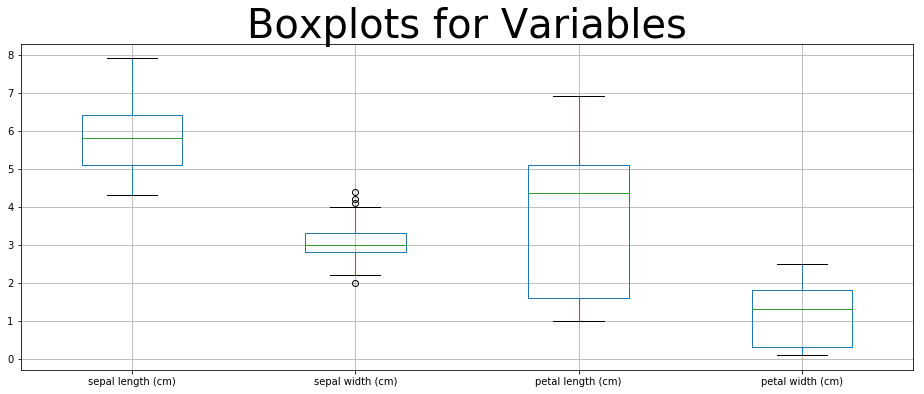

In [6]:
plt.figure(figsize=(16,6))
boxplots = iris_dataframe.boxplot(return_type="axes")
plt.title("Boxplots for Variables",color="black",fontsize=40)

Text(0, 0.5, 'Sepal Length')

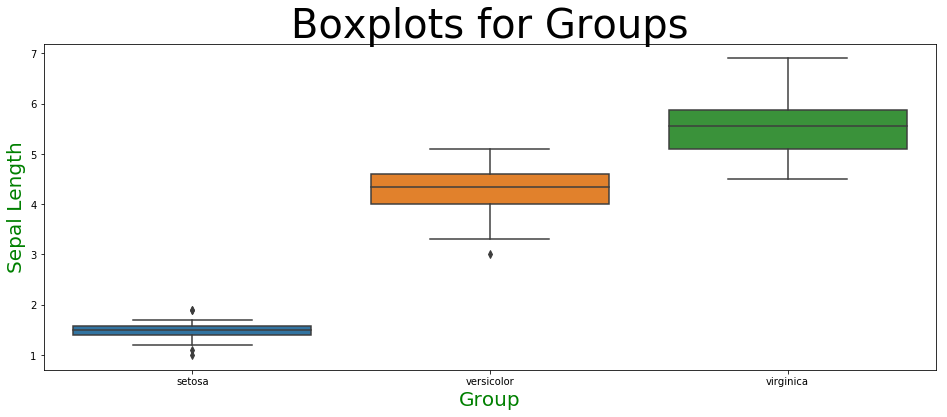

In [7]:
plt.figure(figsize=(16,6))

sns.boxplot(y ="petal length (cm)" ,x="group" ,data=iris_dataframe)
plt.title("Boxplots for Groups",color="black",fontsize=40)
plt.xlabel("Group",fontsize=20,color="green")
plt.ylabel("Sepal Length",fontsize=20,color="green")


## Part 3: T-tests

**T-test** compares ONLY **two features (two groups)** at a time, to see if there is significant difference between their **means**.

In [7]:
from scipy.stats import ttest_ind

Up next, **versicolor** with **virginica** means are tested 

1. Create groups
2. Check Variance

In [11]:
group0 = iris_dataframe["group"] == "setosa"
group1 = iris_dataframe["group"] == "versicolor"
group2 = iris_dataframe["group"] == "virginica"

print ("Variance of Petal Length of Versicolor: %0.3f\nVariance of Petal Length of Virginica:  %0.3f" % (iris_dataframe["petal length (cm)"][group1].var(),iris_dataframe["petal length (cm)"][group2].var()))

Variance of Petal Length of Versicolor: 0.221
Variance of Petal Length of Virginica:  0.305


Caclulate whether the groups have similar variance or not

In [12]:
t, pvalue = ttest_ind(iris_dataframe["sepal width (cm)"][group1], iris_dataframe["sepal width (cm)"][group2],axis=0, equal_var=False)
print ("T statistic: %0.3f\nP-value:      %0.3f" % (t,pvalue))

T statistic: -3.206
P-value:      0.002


The **P-value** is the probability that the calculated **T statistic** difference is just due to chance. 

- If **P-value** is **below 0.05**, it means that the group means are significantly different.
- In the above example the means are different. 

## Part 4: ANOVA

To check **MORE than two features (groups in this case)**, we need **ANOVA**. 

In this case P-Value has an interpretation similar to the T-test

In [36]:
from scipy.stats import f_oneway

f,pvalue = f_oneway (iris_dataframe["sepal width (cm)"][group0],iris_dataframe["sepal width (cm)"][group1],iris_dataframe["sepal width (cm)"][group2])

print ("One-way ANOVA\nF-value: %0.3f\nP-value: %0.3f" % (f,pvalue))

One-way ANOVA
F-value: 49.160
P-value: 0.000


**F test:** The above value provides us a point where we can use it to reject data. The F test is following the null hypothesis once we identify the critical value.

## Part 5: Standardization / Creating a Z score

As we saw above, there are different scales and the data are heterogenous.

As such, we will need to **transform data** in a way that makes them easily comparable.

In the following example we will standardize data, which means that we will use the equation: [x-mean(Σx)] / std(Σx) for all features of the iris dataset.

In [12]:
from sklearn.preprocessing import scale

stand_sepal_length = scale(iris_dataframe["sepal length (cm)"])
stand_sepal_width = scale(iris_dataframe["sepal width (cm)"])
stand_petal_length = scale(iris_dataframe["petal length (cm)"])
stand_petal_width = scale(iris_dataframe["petal width (cm)"])

In [13]:
df1 = pd.DataFrame({'Sepal Length':stand_sepal_length,'Sepal Width':stand_sepal_width,'Petal Width':stand_petal_width,'Petal Length':stand_petal_length, "Category": iris_dataframe["group"]})
df1.head()

,Sepal Length,Sepal Width,Petal Width,Petal Length,Category
0,-0.900681,1.019004,-1.315444,-1.340227,setosa
1,-1.143017,-0.131979,-1.315444,-1.340227,setosa
2,-1.385353,0.328414,-1.315444,-1.397064,setosa
3,-1.506521,0.098217,-1.315444,-1.283389,setosa
4,-1.021849,1.249201,-1.315444,-1.340227,setosa


## Part 6: Boxplots after Standardization

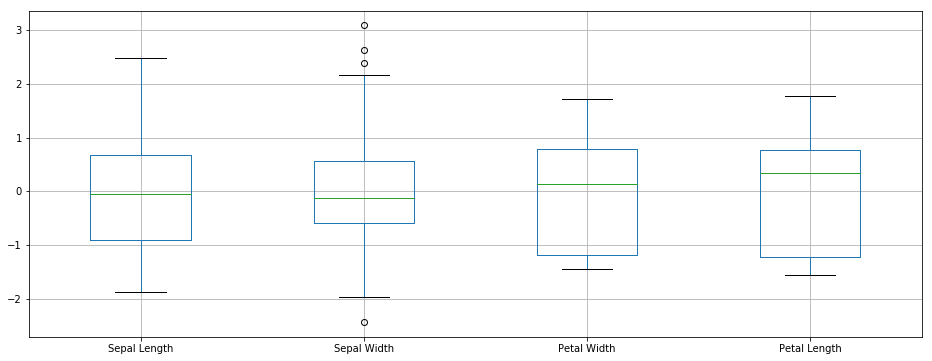

In [14]:
plt.figure(figsize=(16,6))
boxplots = df1.boxplot(return_type="axes")

## Part 7: Conclusions:

By standardizing the data and by viewing the last boxplot chart, it is easier to compare and to reach into conclusions.

- One thing here is that means are approximately similar but not the same. This is because data were standardized.
- Another thing is that it is easier to detect and remove outliers. 